# Spam Email Detection

Tutorial Link: https://www.kaggle.com/code/mfaisalqureshi/email-spam-detection-98-accuracy 

#### 1. Data Acquisition

In [15]:
# spare cell to install necessary packages
!pip install wordcloud


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------------ -------------------------- 51.2/165.5 kB 1.3 MB/s eta 0:00:01
     ------------------- ------------------- 81.9/165.5 kB 1.2 MB/s eta 0:00:01
     ------------------------- ------------ 112.6/165.5 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 995.2 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 544.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 655.4 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 653.6 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 784.3 kB/s eta 0:00:01
   ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
# import necessary libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# load dataset

data = pd.read_csv('/Users/mohana.selvakumar/Downloads/spam.csv')

data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### 2. Data Preprocessing

In [7]:
# count null columns

data.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
# label spam data

data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
# convert all text to lowercase for consistency

data['Message'] = data['Message'].str.lower()

In [10]:
# lemmatization

# import nltk
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# data['Message'] = data['Message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


#### 3. Model Development

In [11]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(data.Message, data.Spam, test_size=0.25, random_state=42)

In [12]:
# transform the text data into a numerical format using TF-IDF Vectorizer

# remove common stop words

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [13]:
# train the naive bayes classifier model

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

#### 4. Model Evaluation

In [14]:
# evaluate the model

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9727207465900933
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1207
           1       0.99      0.80      0.89       186

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix:
 [[1206    1]
 [  37  149]]


#### 5. Prediction

In [15]:
# example new messages to classify
new_messages = [
    "Congratulations! You've won a free ticket to the Bahamas. Call now to claim.",
    "Hey, are we still on for dinner tonight?",
    "Earn money from home without any effort!"
]

In [16]:
# preprocess the new messages
new_messages = [msg.lower() for msg in new_messages]

# transform the new messages using the fitted TfidfVectorizer
new_messages_tfidf = vectorizer.transform(new_messages)

In [17]:
# predict using the trained model
predictions = model.predict(new_messages_tfidf)

# output of predictions
for message, prediction in zip(new_messages, predictions):
    print(f"Message: {message}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")
    print()

Message: congratulations! you've won a free ticket to the bahamas. call now to claim.
Prediction: Spam

Message: hey, are we still on for dinner tonight?
Prediction: Ham

Message: earn money from home without any effort!
Prediction: Ham



#### Some Visualisations

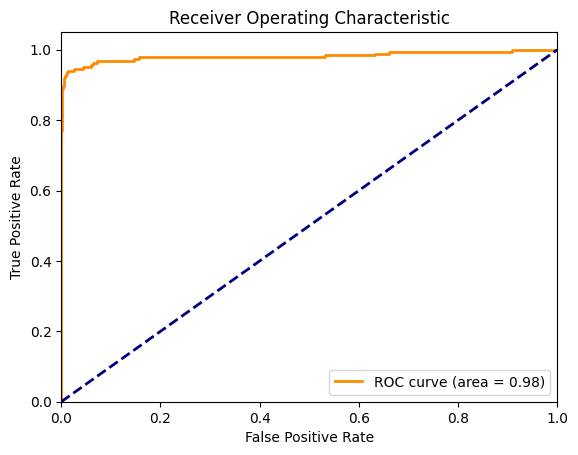

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
